In [1]:
#import numpy as pandas is based on numpy arrays and we want to use some of this library's functions
import numpy as np

#import pandas to read csv excel and other file types as dataframes
import pandas as pd  

#import matplotlib to produce graphs
import matplotlib.pyplot as plt 

# set matplotlib to display inline in this notebook
%matplotlib inline 


### Read in data set and clean up

In [2]:
#read in excel sheet using pandas (this assumes in same folder as this note book, otherwise specify full path)
myDF=pd.read_excel('Online Retail.xlsx')
newDF=myDF[myDF['Quantity']>0].dropna()  # only include row with positive quantities and drop rows with missing data
newDF['CustomerID']=newDF['CustomerID'].apply(lambda x:str('{:.0f}'.format(x))) # fix customer ID
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null object
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


# What are the most popular products, 
### By how much
### What is their price variance
### how does demand vary with price
### when are they sold, 
### who are they sold to, 

In [3]:
def freq_cat(x):
    return x.value_counts().sort_values(ascending=False)/x.value_counts().sum()*100

In [10]:
freq_cat(newDF['Description']).head(20).cumsum()

WHITE HANGING HEART T-LIGHT HOLDER    0.509645
REGENCY CAKESTAND 3 TIER              0.942894
JUMBO BAG RED RETROSPOT               1.349504
ASSORTED COLOUR BIRD ORNAMENT         1.703340
PARTY BUNTING                         2.054412
LUNCH BAG RED RETROSPOT               2.385129
SET OF 3 CAKE TINS PANTRY DESIGN      2.676390
LUNCH BAG  BLACK SKULL.               2.954082
POSTAGE                               3.230265
PACK OF 72 RETROSPOT CAKE CASES       3.498658
PAPER CHAIN KIT 50'S CHRISTMAS        3.754737
SPOTTY BUNTING                        4.010314
LUNCH BAG SPACEBOY DESIGN             4.263628
LUNCH BAG CARS BLUE                   4.512168
HEART OF WICKER SMALL                 4.759703
NATURAL SLATE HEART CHALKBOARD        5.005981
LUNCH BAG PINK POLKADOT               5.246479
REX CASH+CARRY JUMBO SHOPPER          5.485721
LUNCH BAG SUKI DESIGN                 5.720188
ALARM CLOCK BAKELIKE RED              5.946110
Name: Description, dtype: float64

In [9]:
newDF['UnitPrice'][newDF['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']\
    .value_counts()\
    .sort_values(ascending=False)
    

2.95    1652
2.55     357
5.79       9
3.20       5
3.24       4
2.40       1
Name: UnitPrice, dtype: int64

In [15]:
tpL=freq_cat(newDF['Description']).head(5).index.tolist()
tpL

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PARTY BUNTING']

In [12]:
freq_cat(newDF['Description']).head(5)

WHITE HANGING HEART T-LIGHT HOLDER    0.509645
REGENCY CAKESTAND 3 TIER              0.433249
JUMBO BAG RED RETROSPOT               0.406610
ASSORTED COLOUR BIRD ORNAMENT         0.353836
PARTY BUNTING                         0.351072
Name: Description, dtype: float64

In [16]:
def priceDist(d):
    return newDF['UnitPrice'][newDF['Description']==d].value_counts().sort_values(ascending=False)
    
priceDist('WHITE HANGING HEART T-LIGHT HOLDER')

2.95    1652
2.55     357
5.79       9
3.20       5
3.24       4
2.40       1
Name: UnitPrice, dtype: int64

In [21]:
for i in tpL:
    print(i,priceDist(i))

WHITE HANGING HEART T-LIGHT HOLDER 2.95    1652
2.55     357
5.79       9
3.20       5
3.24       4
2.40       1
Name: UnitPrice, dtype: int64
REGENCY CAKESTAND 3 TIER 12.75    1401
10.95     309
24.96      10
4.00        2
0.00        1
5.00        1
Name: UnitPrice, dtype: int64
JUMBO BAG RED RETROSPOT 2.08    1077
1.95     319
1.79     135
1.65      65
1.74      11
1.75       5
4.13       5
2.04       1
Name: UnitPrice, dtype: int64
ASSORTED COLOUR BIRD ORNAMENT 1.69    1354
1.45      54
Name: UnitPrice, dtype: int64
PARTY BUNTING 4.95     1205
4.15      103
4.65       70
3.75       13
10.79       3
4.30        2
0.00        1
Name: UnitPrice, dtype: int64


In [23]:
newDF['UnitSalesValue']=newDF['UnitPrice']*newDF['Quantity']
newDF.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitSalesValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [25]:
newDF[['Description','UnitSalesValue']].groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(10)

,UnitSalesValue
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


In [15]:
newDF[['Description','UnitSalesValue']]\
    .groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(10).cumsum()\
    /newDF['UnitSalesValue'].sum()*100



,UnitSalesValue
Description,
"PAPER CRAFT , LITTLE BIRDIE",1.890494
REGENCY CAKESTAND 3 TIER,3.490611
WHITE HANGING HEART T-LIGHT HOLDER,4.617797
JUMBO BAG RED RETROSPOT,5.574108
MEDIUM CERAMIC TOP STORAGE JAR,6.487731
POSTAGE,7.360814
PARTY BUNTING,8.133356
ASSORTED COLOUR BIRD ORNAMENT,8.768276
Manual,9.371771


In [27]:
newDF[['Description','UnitSalesValue']]\
    .groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(10)/newDF['UnitSalesValue'].sum()*100

,UnitSalesValue
Description,
"PAPER CRAFT , LITTLE BIRDIE",1.890494
REGENCY CAKESTAND 3 TIER,1.600117
WHITE HANGING HEART T-LIGHT HOLDER,1.127186
JUMBO BAG RED RETROSPOT,0.956311
MEDIUM CERAMIC TOP STORAGE JAR,0.913624
POSTAGE,0.873083
PARTY BUNTING,0.772542
ASSORTED COLOUR BIRD ORNAMENT,0.634920
Manual,0.603495


In [28]:
tpValueDF=newDF[['Description','UnitSalesValue']]\
    .groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(10)

In [29]:
tpValueL=tpValueDF.index.tolist()
tpValueL

['PAPER CRAFT , LITTLE BIRDIE',
 'REGENCY CAKESTAND 3 TIER',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED RETROSPOT',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 'POSTAGE',
 'PARTY BUNTING',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'Manual',
 'RABBIT NIGHT LIGHT']

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text xticklabel objects>)

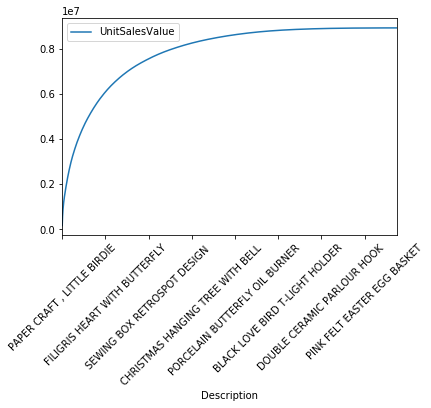

In [31]:
newDF[['Description','UnitSalesValue']]\
    .groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).cumsum()\
    .plot()
    
plt.xticks(rotation=45)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text xticklabel objects>)

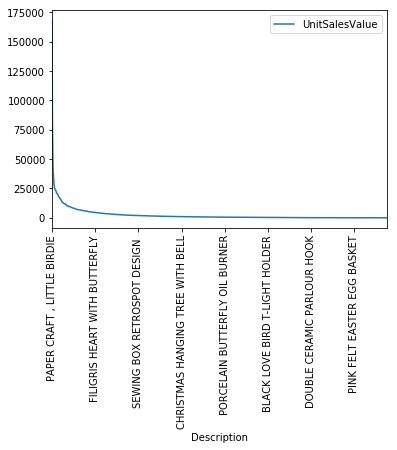

In [23]:
newDF[['Description','UnitSalesValue']]\
    .groupby('Description')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False)\
    .plot()
    
plt.xticks(rotation=90)

In [27]:
for i in tpValueL:
    print(i,priceDist(i))

PAPER CRAFT , LITTLE BIRDIE 2.08    1
Name: UnitPrice, dtype: int64
REGENCY CAKESTAND 3 TIER 12.75    1401
10.95     309
24.96      10
4.00        2
0.00        1
5.00        1
Name: UnitPrice, dtype: int64
WHITE HANGING HEART T-LIGHT HOLDER 2.95    1652
2.55     357
5.79       9
3.20       5
3.24       4
2.40       1
Name: UnitPrice, dtype: int64
JUMBO BAG RED RETROSPOT 2.08    1077
1.95     319
1.79     135
1.65      65
1.74      11
1.75       5
4.13       5
2.04       1
Name: UnitPrice, dtype: int64
MEDIUM CERAMIC TOP STORAGE JAR 1.25    170
1.04     28
Name: UnitPrice, dtype: int64
POSTAGE 18.00      697
15.00      137
40.00      127
28.00       99
1.00         4
4.95         3
145.00       3
6.00         2
50.00        2
35.00        2
240.00       2
300.00       1
20.00        1
4.50         1
4.00         1
10.00        1
17.00        1
5.00         1
8142.75      1
350.00       1
45.00        1
2.02         1
550.94       1
2.90         1
523.00       1
150.00       1
700.00   

# Who are our biggest customers, 
### by how much, 
### what do they buy, 
### when do they buy it, 
### where are they located

In [32]:
newDF[['CustomerID','UnitSalesValue']]\
    .groupby('CustomerID')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(20).cumsum()\
    /newDF['UnitSalesValue'].sum()*100


,UnitSalesValue
CustomerID,
14646,3.144352
18102,6.058115
17450,8.241280
16446,10.131807
14911,11.745750
12415,13.147487
14156,14.464671
17511,15.486534
16029,16.395760


In [30]:
tcValueDF=newDF[['CustomerID','UnitSalesValue']]\
    .groupby('CustomerID')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).head(10)

In [31]:
tcValueL=tcValueDF.index.tolist()
tcValueL

['14646',
 '18102',
 '17450',
 '16446',
 '14911',
 '12415',
 '14156',
 '17511',
 '16029',
 '12346']

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text xticklabel objects>)

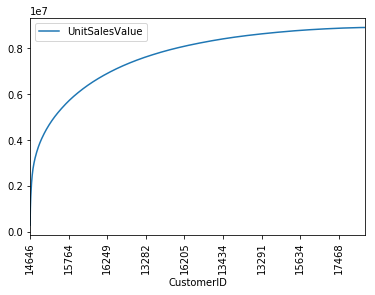

In [71]:
newDF[['CustomerID','UnitSalesValue']]\
    .groupby('CustomerID')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).cumsum()\
    .plot()
    
plt.xticks(rotation=90)

In [32]:
def custProds(c):
    return newDF[['Description','UnitPrice','Quantity','UnitSalesValue']]\
    [newDF['CustomerID']==c]\
    .sort_values('UnitSalesValue',ascending=False).head(5)
    
custProds('14646')

,Description,UnitPrice,Quantity,UnitSalesValue
421601,RABBIT NIGHT LIGHT,2.08,2400,4992.00
534952,RABBIT NIGHT LIGHT,1.79,1440,2577.60
204198,5 HOOK HANGER RED MAGIC TOADSTOOL,1.45,960,1392.00
409248,GINGHAM HEART DECORATION,0.72,1728,1244.16
137026,SPACEBOY LUNCH BOX,1.65,640,1056.00


In [18]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


height has been deprecated.



In [24]:
for i in tcValueL:
    print('CustomerID >> {}'.format(i))
    print(custProds(i))
    print('\n')
    print('_'*100)

CustomerID >> 14646
                              Description  UnitPrice  Quantity  UnitSalesValue
421601                 RABBIT NIGHT LIGHT       2.08      2400         4992.00
534952                 RABBIT NIGHT LIGHT       1.79      1440         2577.60
204198  5 HOOK HANGER RED MAGIC TOADSTOOL       1.45       960         1392.00
409248           GINGHAM HEART DECORATION       0.72      1728         1244.16
137026                SPACEBOY LUNCH BOX        1.65       640         1056.00


____________________________________________________________________________________________________
CustomerID >> 18102
                          Description  UnitPrice  Quantity  UnitSalesValue
16438    VINTAGE UNION JACK MEMOBOARD       6.38       600          3828.0
411229  LANDMARK FRAME COVENT GARDEN       10.95       300          3285.0
411235   LANDMARK FRAME BAKER STREET       10.95       300          3285.0
411234    LANDMARK FRAME CAMDEN TOWN       10.95       300          3285.0
411232  

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text xticklabel objects>)

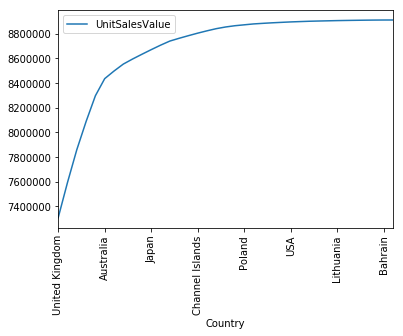

In [92]:
newDF[['Country','UnitSalesValue']]\
    .groupby('Country')\
    .sum()\
    .sort_values('UnitSalesValue',ascending=False).cumsum()\
    .plot()
    
plt.xticks(rotation=90)

In [197]:
def custCountry(c):
    return newDF[['Country']][newDF['CustomerID']==c]\
    .groupby('Country').count().reset_index().to_string(header=False)
    
custCountry('14646')

'0  Netherlands'

In [30]:
def custCountry2(c):
    return newDF[['Country']][newDF['CustomerID']==c].groupby('Country').count().reset_index()
    
custCountry2('14646')

,Country
0,Netherlands


In [31]:
for i in tcValueL:
    print('{} {}'.format(i,custCountry2(i)))

14646        Country
0  Netherlands
18102           Country
0  United Kingdom
17450           Country
0  United Kingdom
16446           Country
0  United Kingdom
14911   Country
0    EIRE
12415      Country
0  Australia
14156   Country
0    EIRE
17511           Country
0  United Kingdom
16029           Country
0  United Kingdom
12346           Country
0  United Kingdom


In [199]:
for i in tcValueL:
    print('{} {}'.format(i,custCountry(i)))

14646 0  Netherlands
18102 0  United Kingdom
17450 0  United Kingdom
16446 0  United Kingdom
14911 0  EIRE
12415 0  Australia
14156 0  EIRE
17511 0  United Kingdom
16029 0  United Kingdom
12346 0  United Kingdom
